# Traveling Salesman Problem

Solved using QUBO on DWave's direct CQM sampler

In [1]:
import time

import numpy as np
import networkx as nx

import dimod

from numpy import random
from dwave.system import LeapHybridCQMSampler
from dwave_networkx.algorithms.tsp import traveling_salesperson

## Generate problem

4950


{(0, 1): Text(0.9990133616401945, 0.03139525253964962, '1'),
 (0, 2): Text(0.9960573587116088, 0.06266660939532046, '1'),
 (0, 3): Text(0.9911436114376782, 0.09369064795521428, '2'),
 (0, 4): Text(0.9842915807347763, 0.1243449440051673, '5'),
 (0, 5): Text(0.9755282675067849, 0.15450849266660882, '7'),
 (0, 6): Text(0.9648882424474154, 0.18406226346481158, '6'),
 (0, 7): Text(0.9524135268309206, 0.2128896324625632, '7'),
 (0, 8): Text(0.9381533242911948, 0.24087684419615965, '7'),
 (0, 9): Text(0.9221639612171302, 0.2679133916550129, '6'),
 (0, 10): Text(0.9045084993224278, 0.2938926123280941, '3'),
 (0, 11): Text(0.8852566164363098, 0.3187119862271556, '8'),
 (0, 12): Text(0.8644843084802969, 0.3422735531192407, '5'),
 (0, 13): Text(0.8422735616426653, 0.3644842999568723, '4'),
 (0, 14): Text(0.8187119947505801, 0.3852566079128852, '7'),
 (0, 15): Text(0.7938926208515187, 0.40450849079900325, '5'),
 (0, 16): Text(0.7679133703761153, 0.4221639824960277, '2'),
 (0, 17): Text(0.740876852

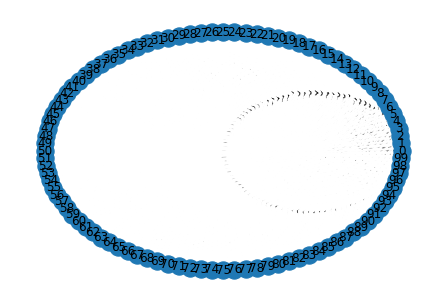

In [15]:
# generate random graph
# number of nodes
num_nodes = 100
# edge generation probability
p = 1
# seed (optional)
seed = 50
random.seed(seed)
#generate graph
graph = nx.gnp_random_graph(num_nodes,p,seed)

for (u, v) in graph.edges():
    graph.edges[u,v]['weight'] = random.randint(1,10)

print(len(graph.edges))
    
# draw graph
pos = nx.circular_layout(graph)
nx.draw(graph, pos=pos, with_labels=True)
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=labels)

## Build CQM

In [16]:
cqm = dimod.ConstrainedQuadraticModel()

n = num_nodes-1

# define variables -------------------------------------
# binary vars x_ij if path from i to j is chosen
# x = [[dimod.Binary((i,j)) for j in graph.nodes] for i in graph.nodes]
x = {}
for i,j in graph.edges:
    x[(i,j)] = dimod.Binary((i,j))
    x[(j,i)] = dimod.Binary((j,i))

# integer variables to help enforce 1 tour
u = [dimod.Integer(f'u{i}', lower_bound=1, upper_bound=max(graph.nodes)) for i in range(num_nodes)]

# objective ------------------------------
obj = 0
for i,j in graph.edges:
    obj += graph[i][j]['weight']*x[(i,j)] + graph[j][i]['weight']*x[(j,i)]
cqm.set_objective(obj)
print(cqm.objective.to_polystring(),'\n')

# constraints -----------------------------
# one incoming edge
for j in graph.nodes:
    edge_sum = 0
    for i in graph.nodes:
        if (i,j) in graph.edges:
            edge_sum += x[(i,j)]
    cqm.add_discrete(edge_sum, label=f'one in {j}')
    
# one outgoing edge
for i in graph.nodes:
    edge_sum = 0
    for j in graph.nodes:
        if (i,j) in graph.edges:
            edge_sum += x[(i,j)]
    cqm.add_constraint(edge_sum==1, label=f'one out {i}')
    
# one tour
for i,j in graph.edges:
    if (i,j)>(1,1) and i<num_nodes and j<num_nodes:
        cqm.add_constraint(u[i]-u[j]+(n)*x[(i,j)] <= n-1, label=f'one tour {i} {j}')
        cqm.add_constraint(u[j]-u[i]+(n)*x[(j,i)] <= n-1, label=f'one tour {j} {i}')
    
for i in cqm.constraints:
    print(i, ':', cqm.constraints[i])

v(0, 1) + v(1, 0) + v(0, 2) + v(2, 0) + 2*v(0, 3) + 2*v(3, 0) + 5*v(0, 4) + 5*v(4, 0) + 7*v(0, 5) + 7*v(5, 0) + 6*v(0, 6) + 6*v(6, 0) + 7*v(0, 7) + 7*v(7, 0) + 7*v(0, 8) + 7*v(8, 0) + 6*v(0, 9) + 6*v(9, 0) + 3*v(0, 10) + 3*v(10, 0) + 8*v(0, 11) + 8*v(11, 0) + 5*v(0, 12) + 5*v(12, 0) + 4*v(0, 13) + 4*v(13, 0) + 7*v(0, 14) + 7*v(14, 0) + 5*v(0, 15) + 5*v(15, 0) + 2*v(0, 16) + 2*v(16, 0) + 6*v(0, 17) + 6*v(17, 0) + v(0, 18) + v(18, 0) + 7*v(0, 19) + 7*v(19, 0) + 4*v(0, 20) + 4*v(20, 0) + 3*v(0, 21) + 3*v(21, 0) + 4*v(0, 22) + 4*v(22, 0) + 4*v(0, 23) + 4*v(23, 0) + 4*v(0, 24) + 4*v(24, 0) + 3*v(0, 25) + 3*v(25, 0) + v(0, 26) + v(26, 0) + 4*v(0, 27) + 4*v(27, 0) + 3*v(0, 28) + 3*v(28, 0) + v(0, 29) + v(29, 0) + 4*v(0, 30) + 4*v(30, 0) + v(0, 31) + v(31, 0) + v(0, 32) + v(32, 0) + 8*v(0, 33) + 8*v(33, 0) + 4*v(0, 34) + 4*v(34, 0) + 9*v(0, 35) + 9*v(35, 0) + 8*v(0, 36) + 8*v(36, 0) + 5*v(0, 37) + 5*v(37, 0) + 5*v(0, 38) + 5*v(38, 0) + v(0, 39) + v(39, 0) + v(0, 40) + v(40, 0) + 4*v(0, 41) + 4

one in 0 : v(1, 0) + v(2, 0) + v(3, 0) + v(4, 0) + v(5, 0) + v(6, 0) + v(7, 0) + v(8, 0) + v(9, 0) + v(10, 0) + v(11, 0) + v(12, 0) + v(13, 0) + v(14, 0) + v(15, 0) + v(16, 0) + v(17, 0) + v(18, 0) + v(19, 0) + v(20, 0) + v(21, 0) + v(22, 0) + v(23, 0) + v(24, 0) + v(25, 0) + v(26, 0) + v(27, 0) + v(28, 0) + v(29, 0) + v(30, 0) + v(31, 0) + v(32, 0) + v(33, 0) + v(34, 0) + v(35, 0) + v(36, 0) + v(37, 0) + v(38, 0) + v(39, 0) + v(40, 0) + v(41, 0) + v(42, 0) + v(43, 0) + v(44, 0) + v(45, 0) + v(46, 0) + v(47, 0) + v(48, 0) + v(49, 0) + v(50, 0) + v(51, 0) + v(52, 0) + v(53, 0) + v(54, 0) + v(55, 0) + v(56, 0) + v(57, 0) + v(58, 0) + v(59, 0) + v(60, 0) + v(61, 0) + v(62, 0) + v(63, 0) + v(64, 0) + v(65, 0) + v(66, 0) + v(67, 0) + v(68, 0) + v(69, 0) + v(70, 0) + v(71, 0) + v(72, 0) + v(73, 0) + v(74, 0) + v(75, 0) + v(76, 0) + v(77, 0) + v(78, 0) + v(79, 0) + v(80, 0) + v(81, 0) + v(82, 0) + v(83, 0) + v(84, 0) + v(85, 0) + v(86, 0) + v(87, 0) + v(88, 0) + v(89, 0) + v(90, 0) + v(91, 0)

one tour 3 36 : u3 - u36 + 99*v(3, 36) <= 98
one tour 36 3 : u36 - u3 + 99*v(36, 3) <= 98
one tour 3 37 : u3 - u37 + 99*v(3, 37) <= 98
one tour 37 3 : u37 - u3 + 99*v(37, 3) <= 98
one tour 3 38 : u3 - u38 + 99*v(3, 38) <= 98
one tour 38 3 : u38 - u3 + 99*v(38, 3) <= 98
one tour 3 39 : u3 - u39 + 99*v(3, 39) <= 98
one tour 39 3 : u39 - u3 + 99*v(39, 3) <= 98
one tour 3 40 : u3 - u40 + 99*v(3, 40) <= 98
one tour 40 3 : u40 - u3 + 99*v(40, 3) <= 98
one tour 3 41 : u3 - u41 + 99*v(3, 41) <= 98
one tour 41 3 : u41 - u3 + 99*v(41, 3) <= 98
one tour 3 42 : u3 - u42 + 99*v(3, 42) <= 98
one tour 42 3 : u42 - u3 + 99*v(42, 3) <= 98
one tour 3 43 : u3 - u43 + 99*v(3, 43) <= 98
one tour 43 3 : u43 - u3 + 99*v(43, 3) <= 98
one tour 3 44 : u3 - u44 + 99*v(3, 44) <= 98
one tour 44 3 : u44 - u3 + 99*v(44, 3) <= 98
one tour 3 45 : u3 - u45 + 99*v(3, 45) <= 98
one tour 45 3 : u45 - u3 + 99*v(45, 3) <= 98
one tour 3 46 : u3 - u46 + 99*v(3, 46) <= 98
one tour 46 3 : u46 - u3 + 99*v(46, 3) <= 98
one tour 3

one tour 39 7 : u39 - u7 + 99*v(39, 7) <= 98
one tour 7 40 : u7 - u40 + 99*v(7, 40) <= 98
one tour 40 7 : u40 - u7 + 99*v(40, 7) <= 98
one tour 7 41 : u7 - u41 + 99*v(7, 41) <= 98
one tour 41 7 : u41 - u7 + 99*v(41, 7) <= 98
one tour 7 42 : u7 - u42 + 99*v(7, 42) <= 98
one tour 42 7 : u42 - u7 + 99*v(42, 7) <= 98
one tour 7 43 : u7 - u43 + 99*v(7, 43) <= 98
one tour 43 7 : u43 - u7 + 99*v(43, 7) <= 98
one tour 7 44 : u7 - u44 + 99*v(7, 44) <= 98
one tour 44 7 : u44 - u7 + 99*v(44, 7) <= 98
one tour 7 45 : u7 - u45 + 99*v(7, 45) <= 98
one tour 45 7 : u45 - u7 + 99*v(45, 7) <= 98
one tour 7 46 : u7 - u46 + 99*v(7, 46) <= 98
one tour 46 7 : u46 - u7 + 99*v(46, 7) <= 98
one tour 7 47 : u7 - u47 + 99*v(7, 47) <= 98
one tour 47 7 : u47 - u7 + 99*v(47, 7) <= 98
one tour 7 48 : u7 - u48 + 99*v(7, 48) <= 98
one tour 48 7 : u48 - u7 + 99*v(48, 7) <= 98
one tour 7 49 : u7 - u49 + 99*v(7, 49) <= 98
one tour 49 7 : u49 - u7 + 99*v(49, 7) <= 98
one tour 7 50 : u7 - u50 + 99*v(7, 50) <= 98
one tour 5

one tour 11 35 : u11 - u35 + 99*v(11, 35) <= 98
one tour 35 11 : u35 - u11 + 99*v(35, 11) <= 98
one tour 11 36 : u11 - u36 + 99*v(11, 36) <= 98
one tour 36 11 : u36 - u11 + 99*v(36, 11) <= 98
one tour 11 37 : u11 - u37 + 99*v(11, 37) <= 98
one tour 37 11 : u37 - u11 + 99*v(37, 11) <= 98
one tour 11 38 : u11 - u38 + 99*v(11, 38) <= 98
one tour 38 11 : u38 - u11 + 99*v(38, 11) <= 98
one tour 11 39 : u11 - u39 + 99*v(11, 39) <= 98
one tour 39 11 : u39 - u11 + 99*v(39, 11) <= 98
one tour 11 40 : u11 - u40 + 99*v(11, 40) <= 98
one tour 40 11 : u40 - u11 + 99*v(40, 11) <= 98
one tour 11 41 : u11 - u41 + 99*v(11, 41) <= 98
one tour 41 11 : u41 - u11 + 99*v(41, 11) <= 98
one tour 11 42 : u11 - u42 + 99*v(11, 42) <= 98
one tour 42 11 : u42 - u11 + 99*v(42, 11) <= 98
one tour 11 43 : u11 - u43 + 99*v(11, 43) <= 98
one tour 43 11 : u43 - u11 + 99*v(43, 11) <= 98
one tour 11 44 : u11 - u44 + 99*v(11, 44) <= 98
one tour 44 11 : u44 - u11 + 99*v(44, 11) <= 98
one tour 11 45 : u11 - u45 + 99*v(11, 45

one tour 76 15 : u76 - u15 + 99*v(76, 15) <= 98
one tour 15 77 : u15 - u77 + 99*v(15, 77) <= 98
one tour 77 15 : u77 - u15 + 99*v(77, 15) <= 98
one tour 15 78 : u15 - u78 + 99*v(15, 78) <= 98
one tour 78 15 : u78 - u15 + 99*v(78, 15) <= 98
one tour 15 79 : u15 - u79 + 99*v(15, 79) <= 98
one tour 79 15 : u79 - u15 + 99*v(79, 15) <= 98
one tour 15 80 : u15 - u80 + 99*v(15, 80) <= 98
one tour 80 15 : u80 - u15 + 99*v(80, 15) <= 98
one tour 15 81 : u15 - u81 + 99*v(15, 81) <= 98
one tour 81 15 : u81 - u15 + 99*v(81, 15) <= 98
one tour 15 82 : u15 - u82 + 99*v(15, 82) <= 98
one tour 82 15 : u82 - u15 + 99*v(82, 15) <= 98
one tour 15 83 : u15 - u83 + 99*v(15, 83) <= 98
one tour 83 15 : u83 - u15 + 99*v(83, 15) <= 98
one tour 15 84 : u15 - u84 + 99*v(15, 84) <= 98
one tour 84 15 : u84 - u15 + 99*v(84, 15) <= 98
one tour 15 85 : u15 - u85 + 99*v(15, 85) <= 98
one tour 85 15 : u85 - u15 + 99*v(85, 15) <= 98
one tour 15 86 : u15 - u86 + 99*v(15, 86) <= 98
one tour 86 15 : u86 - u15 + 99*v(86, 15

one tour 83 20 : u83 - u20 + 99*v(83, 20) <= 98
one tour 20 84 : u20 - u84 + 99*v(20, 84) <= 98
one tour 84 20 : u84 - u20 + 99*v(84, 20) <= 98
one tour 20 85 : u20 - u85 + 99*v(20, 85) <= 98
one tour 85 20 : u85 - u20 + 99*v(85, 20) <= 98
one tour 20 86 : u20 - u86 + 99*v(20, 86) <= 98
one tour 86 20 : u86 - u20 + 99*v(86, 20) <= 98
one tour 20 87 : u20 - u87 + 99*v(20, 87) <= 98
one tour 87 20 : u87 - u20 + 99*v(87, 20) <= 98
one tour 20 88 : u20 - u88 + 99*v(20, 88) <= 98
one tour 88 20 : u88 - u20 + 99*v(88, 20) <= 98
one tour 20 89 : u20 - u89 + 99*v(20, 89) <= 98
one tour 89 20 : u89 - u20 + 99*v(89, 20) <= 98
one tour 20 90 : u20 - u90 + 99*v(20, 90) <= 98
one tour 90 20 : u90 - u20 + 99*v(90, 20) <= 98
one tour 20 91 : u20 - u91 + 99*v(20, 91) <= 98
one tour 91 20 : u91 - u20 + 99*v(91, 20) <= 98
one tour 20 92 : u20 - u92 + 99*v(20, 92) <= 98
one tour 92 20 : u92 - u20 + 99*v(92, 20) <= 98
one tour 20 93 : u20 - u93 + 99*v(20, 93) <= 98
one tour 93 20 : u93 - u20 + 99*v(93, 20

one tour 26 83 : u26 - u83 + 99*v(26, 83) <= 98
one tour 83 26 : u83 - u26 + 99*v(83, 26) <= 98
one tour 26 84 : u26 - u84 + 99*v(26, 84) <= 98
one tour 84 26 : u84 - u26 + 99*v(84, 26) <= 98
one tour 26 85 : u26 - u85 + 99*v(26, 85) <= 98
one tour 85 26 : u85 - u26 + 99*v(85, 26) <= 98
one tour 26 86 : u26 - u86 + 99*v(26, 86) <= 98
one tour 86 26 : u86 - u26 + 99*v(86, 26) <= 98
one tour 26 87 : u26 - u87 + 99*v(26, 87) <= 98
one tour 87 26 : u87 - u26 + 99*v(87, 26) <= 98
one tour 26 88 : u26 - u88 + 99*v(26, 88) <= 98
one tour 88 26 : u88 - u26 + 99*v(88, 26) <= 98
one tour 26 89 : u26 - u89 + 99*v(26, 89) <= 98
one tour 89 26 : u89 - u26 + 99*v(89, 26) <= 98
one tour 26 90 : u26 - u90 + 99*v(26, 90) <= 98
one tour 90 26 : u90 - u26 + 99*v(90, 26) <= 98
one tour 26 91 : u26 - u91 + 99*v(26, 91) <= 98
one tour 91 26 : u91 - u26 + 99*v(91, 26) <= 98
one tour 26 92 : u26 - u92 + 99*v(26, 92) <= 98
one tour 92 26 : u92 - u26 + 99*v(92, 26) <= 98
one tour 26 93 : u26 - u93 + 99*v(26, 93

one tour 32 96 : u32 - u96 + 99*v(32, 96) <= 98
one tour 96 32 : u96 - u32 + 99*v(96, 32) <= 98
one tour 32 97 : u32 - u97 + 99*v(32, 97) <= 98
one tour 97 32 : u97 - u32 + 99*v(97, 32) <= 98
one tour 32 98 : u32 - u98 + 99*v(32, 98) <= 98
one tour 98 32 : u98 - u32 + 99*v(98, 32) <= 98
one tour 32 99 : u32 - u99 + 99*v(32, 99) <= 98
one tour 99 32 : u99 - u32 + 99*v(99, 32) <= 98
one tour 33 34 : u33 - u34 + 99*v(33, 34) <= 98
one tour 34 33 : u34 - u33 + 99*v(34, 33) <= 98
one tour 33 35 : u33 - u35 + 99*v(33, 35) <= 98
one tour 35 33 : u35 - u33 + 99*v(35, 33) <= 98
one tour 33 36 : u33 - u36 + 99*v(33, 36) <= 98
one tour 36 33 : u36 - u33 + 99*v(36, 33) <= 98
one tour 33 37 : u33 - u37 + 99*v(33, 37) <= 98
one tour 37 33 : u37 - u33 + 99*v(37, 33) <= 98
one tour 33 38 : u33 - u38 + 99*v(33, 38) <= 98
one tour 38 33 : u38 - u33 + 99*v(38, 33) <= 98
one tour 33 39 : u33 - u39 + 99*v(33, 39) <= 98
one tour 39 33 : u39 - u33 + 99*v(39, 33) <= 98
one tour 33 40 : u33 - u40 + 99*v(33, 40

one tour 73 39 : u73 - u39 + 99*v(73, 39) <= 98
one tour 39 74 : u39 - u74 + 99*v(39, 74) <= 98
one tour 74 39 : u74 - u39 + 99*v(74, 39) <= 98
one tour 39 75 : u39 - u75 + 99*v(39, 75) <= 98
one tour 75 39 : u75 - u39 + 99*v(75, 39) <= 98
one tour 39 76 : u39 - u76 + 99*v(39, 76) <= 98
one tour 76 39 : u76 - u39 + 99*v(76, 39) <= 98
one tour 39 77 : u39 - u77 + 99*v(39, 77) <= 98
one tour 77 39 : u77 - u39 + 99*v(77, 39) <= 98
one tour 39 78 : u39 - u78 + 99*v(39, 78) <= 98
one tour 78 39 : u78 - u39 + 99*v(78, 39) <= 98
one tour 39 79 : u39 - u79 + 99*v(39, 79) <= 98
one tour 79 39 : u79 - u39 + 99*v(79, 39) <= 98
one tour 39 80 : u39 - u80 + 99*v(39, 80) <= 98
one tour 80 39 : u80 - u39 + 99*v(80, 39) <= 98
one tour 39 81 : u39 - u81 + 99*v(39, 81) <= 98
one tour 81 39 : u81 - u39 + 99*v(81, 39) <= 98
one tour 39 82 : u39 - u82 + 99*v(39, 82) <= 98
one tour 82 39 : u82 - u39 + 99*v(82, 39) <= 98
one tour 39 83 : u39 - u83 + 99*v(39, 83) <= 98
one tour 83 39 : u83 - u39 + 99*v(83, 39

one tour 51 46 : u51 - u46 + 99*v(51, 46) <= 98
one tour 46 52 : u46 - u52 + 99*v(46, 52) <= 98
one tour 52 46 : u52 - u46 + 99*v(52, 46) <= 98
one tour 46 53 : u46 - u53 + 99*v(46, 53) <= 98
one tour 53 46 : u53 - u46 + 99*v(53, 46) <= 98
one tour 46 54 : u46 - u54 + 99*v(46, 54) <= 98
one tour 54 46 : u54 - u46 + 99*v(54, 46) <= 98
one tour 46 55 : u46 - u55 + 99*v(46, 55) <= 98
one tour 55 46 : u55 - u46 + 99*v(55, 46) <= 98
one tour 46 56 : u46 - u56 + 99*v(46, 56) <= 98
one tour 56 46 : u56 - u46 + 99*v(56, 46) <= 98
one tour 46 57 : u46 - u57 + 99*v(46, 57) <= 98
one tour 57 46 : u57 - u46 + 99*v(57, 46) <= 98
one tour 46 58 : u46 - u58 + 99*v(46, 58) <= 98
one tour 58 46 : u58 - u46 + 99*v(58, 46) <= 98
one tour 46 59 : u46 - u59 + 99*v(46, 59) <= 98
one tour 59 46 : u59 - u46 + 99*v(59, 46) <= 98
one tour 46 60 : u46 - u60 + 99*v(46, 60) <= 98
one tour 60 46 : u60 - u46 + 99*v(60, 46) <= 98
one tour 46 61 : u46 - u61 + 99*v(46, 61) <= 98
one tour 61 46 : u61 - u46 + 99*v(61, 46

one tour 54 85 : u54 - u85 + 99*v(54, 85) <= 98
one tour 85 54 : u85 - u54 + 99*v(85, 54) <= 98
one tour 54 86 : u54 - u86 + 99*v(54, 86) <= 98
one tour 86 54 : u86 - u54 + 99*v(86, 54) <= 98
one tour 54 87 : u54 - u87 + 99*v(54, 87) <= 98
one tour 87 54 : u87 - u54 + 99*v(87, 54) <= 98
one tour 54 88 : u54 - u88 + 99*v(54, 88) <= 98
one tour 88 54 : u88 - u54 + 99*v(88, 54) <= 98
one tour 54 89 : u54 - u89 + 99*v(54, 89) <= 98
one tour 89 54 : u89 - u54 + 99*v(89, 54) <= 98
one tour 54 90 : u54 - u90 + 99*v(54, 90) <= 98
one tour 90 54 : u90 - u54 + 99*v(90, 54) <= 98
one tour 54 91 : u54 - u91 + 99*v(54, 91) <= 98
one tour 91 54 : u91 - u54 + 99*v(91, 54) <= 98
one tour 54 92 : u54 - u92 + 99*v(54, 92) <= 98
one tour 92 54 : u92 - u54 + 99*v(92, 54) <= 98
one tour 54 93 : u54 - u93 + 99*v(54, 93) <= 98
one tour 93 54 : u93 - u54 + 99*v(93, 54) <= 98
one tour 54 94 : u54 - u94 + 99*v(54, 94) <= 98
one tour 94 54 : u94 - u54 + 99*v(94, 54) <= 98
one tour 54 95 : u54 - u95 + 99*v(54, 95

one tour 94 64 : u94 - u64 + 99*v(94, 64) <= 98
one tour 64 95 : u64 - u95 + 99*v(64, 95) <= 98
one tour 95 64 : u95 - u64 + 99*v(95, 64) <= 98
one tour 64 96 : u64 - u96 + 99*v(64, 96) <= 98
one tour 96 64 : u96 - u64 + 99*v(96, 64) <= 98
one tour 64 97 : u64 - u97 + 99*v(64, 97) <= 98
one tour 97 64 : u97 - u64 + 99*v(97, 64) <= 98
one tour 64 98 : u64 - u98 + 99*v(64, 98) <= 98
one tour 98 64 : u98 - u64 + 99*v(98, 64) <= 98
one tour 64 99 : u64 - u99 + 99*v(64, 99) <= 98
one tour 99 64 : u99 - u64 + 99*v(99, 64) <= 98
one tour 65 66 : u65 - u66 + 99*v(65, 66) <= 98
one tour 66 65 : u66 - u65 + 99*v(66, 65) <= 98
one tour 65 67 : u65 - u67 + 99*v(65, 67) <= 98
one tour 67 65 : u67 - u65 + 99*v(67, 65) <= 98
one tour 65 68 : u65 - u68 + 99*v(65, 68) <= 98
one tour 68 65 : u68 - u65 + 99*v(68, 65) <= 98
one tour 65 69 : u65 - u69 + 99*v(65, 69) <= 98
one tour 69 65 : u69 - u65 + 99*v(69, 65) <= 98
one tour 65 70 : u65 - u70 + 99*v(65, 70) <= 98
one tour 70 65 : u70 - u65 + 99*v(70, 65

one tour 82 87 : u82 - u87 + 99*v(82, 87) <= 98
one tour 87 82 : u87 - u82 + 99*v(87, 82) <= 98
one tour 82 88 : u82 - u88 + 99*v(82, 88) <= 98
one tour 88 82 : u88 - u82 + 99*v(88, 82) <= 98
one tour 82 89 : u82 - u89 + 99*v(82, 89) <= 98
one tour 89 82 : u89 - u82 + 99*v(89, 82) <= 98
one tour 82 90 : u82 - u90 + 99*v(82, 90) <= 98
one tour 90 82 : u90 - u82 + 99*v(90, 82) <= 98
one tour 82 91 : u82 - u91 + 99*v(82, 91) <= 98
one tour 91 82 : u91 - u82 + 99*v(91, 82) <= 98
one tour 82 92 : u82 - u92 + 99*v(82, 92) <= 98
one tour 92 82 : u92 - u82 + 99*v(92, 82) <= 98
one tour 82 93 : u82 - u93 + 99*v(82, 93) <= 98
one tour 93 82 : u93 - u82 + 99*v(93, 82) <= 98
one tour 82 94 : u82 - u94 + 99*v(82, 94) <= 98
one tour 94 82 : u94 - u82 + 99*v(94, 82) <= 98
one tour 82 95 : u82 - u95 + 99*v(82, 95) <= 98
one tour 95 82 : u95 - u82 + 99*v(95, 82) <= 98
one tour 82 96 : u82 - u96 + 99*v(82, 96) <= 98
one tour 96 82 : u96 - u82 + 99*v(96, 82) <= 98
one tour 82 97 : u82 - u97 + 99*v(82, 97

### Check time requirements and problem requirements
less than 10,000 vars and less than 100,000 constraints

In [17]:
sampler = LeapHybridCQMSampler()
print("time required:",sampler.min_time_limit(cqm))
print("num vars:",len(cqm.variables))
print("num constraints:",len(cqm.constraints))

time required: 5
num vars: 9999
num constraints: 9902


In [18]:
start = time.time()
# run hybrid solver
sampleset = sampler.sample_cqm(cqm, time_limit=5, label='CQM TSP')
feasible_sampleset = sampleset.filter(lambda row: row.is_feasible)
elapsed = time.time() - start
print("Solved in %.2f seconds" % elapsed)

try:
    sample = feasible_sampleset.first.sample
    solution = feasible_sampleset.first
    print(solution)
except:
    print("\nNo feasible solutions found")
    solution = sampleset.first

Solved in 322.34 seconds

No feasible solutions found


In [19]:
# print(solution)
violations = 0
for i in range(len(solution.is_satisfied)):
    if not solution.is_satisfied[i]:
        violations += 1

print(violations)


# for label, violation in cqm.iter_violations(solution.sample, clip=True):
#     print(label, violation)

12


In [20]:
soln = solution.sample
path = {}
for i in soln:
#     if soln[i] > 0.5:
#         print(i, soln[i])
    if type(i) is tuple:
        path[i] = soln[i]

# calculate distance of chosen path
dist = 0
for i,j in path:
    if path[(i,j)]>0.5:
        dist += graph[i][j]['weight']
        
print(dist)

443


## Redraw graph with solution

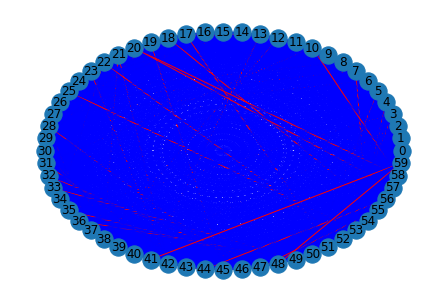

In [8]:
for i,j in path:
    if (i,j) in graph.edges:
        graph[i][j]['color'] = 'blue'
    if path[(i,j)] > 0.5 or path[(j,i)] > 0.5:
        graph[i][j]['color'] = 'red'
        
edges = graph.edges()
colors = [graph[u][v]['color'] for u,v in edges]
weights = [graph[u][v]['weight'] for u,v in edges]

# draw
nx.draw(graph, pos, edge_color=colors, with_labels=True)
labels = nx.get_edge_attributes(graph, 'weight')
# nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=labels)

sampler = dimod.ExactCQMSolver()
start = time.time()
# run hybrid solver
sampleset = sampler.sample_cqm(cqm)
feasible_sampleset = sampleset.filter(lambda row: row.is_feasible)
elapsed = time.time() - start
print("Solved in %.2f seconds" % elapsed)

try:
    sample = feasible_sampleset.first.sample
    solution = feasible_sampleset.first
    print(solution)
except:
    print("\nNo feasible solutions found")
    solution = sampleset.first